<a href="https://colab.research.google.com/github/alirustama/Mansoori/blob/master/explore_weather_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

     

In [6]:
try:
 city_data= pd.read_csv('results.csv')
except Exception as er:
 print(str(er))
print(city_data.shape)

(271, 8)


In [7]:
print(city_data[city_data.isnull().any(axis=1)])

     city_year    city  ... 7-year MA_mumb  7_year MA_global
0         1750  Mumbai  ...            NaN               NaN
1         1751  Mumbai  ...            NaN               NaN
2         1752  Mumbai  ...            NaN               NaN
3         1753  Mumbai  ...            NaN               NaN
4         1754  Mumbai  ...            NaN               NaN
5         1755  Mumbai  ...            NaN               NaN
264       2014  Mumbai  ...          14.00               NaN
265       2015  Mumbai  ...          14.55               NaN
266       2016  Mumbai  ...          15.22               NaN
267       2017  Mumbai  ...          16.01               NaN
268       2018  Mumbai  ...          17.01               NaN
269       2019  Mumbai  ...          18.01               NaN
270       2020  Mumbai  ...          19.01               NaN

[13 rows x 8 columns]


In [8]:
city_data.isnull().sum()

city_year            0
city                 0
country              0
city_avg_temp        0
global_year          0
global_avg_temp      0
7-year MA_mumb       6
7_year MA_global    13
dtype: int64

In [9]:
try:
 city_data = pd.read_csv('results.csv')
except Exception as er:
 print(str(er))
print(city_data.shape)

(271, 8)


In [10]:
city_data.isnull().sum()

city_year            0
city                 0
country              0
city_avg_temp        0
global_year          0
global_avg_temp      0
7-year MA_mumb       6
7_year MA_global    13
dtype: int64

In [11]:
print(city_data[city_data.isnull().any(axis=1)])

     city_year    city  ... 7-year MA_mumb  7_year MA_global
0         1750  Mumbai  ...            NaN               NaN
1         1751  Mumbai  ...            NaN               NaN
2         1752  Mumbai  ...            NaN               NaN
3         1753  Mumbai  ...            NaN               NaN
4         1754  Mumbai  ...            NaN               NaN
5         1755  Mumbai  ...            NaN               NaN
264       2014  Mumbai  ...          14.00               NaN
265       2015  Mumbai  ...          14.55               NaN
266       2016  Mumbai  ...          15.22               NaN
267       2017  Mumbai  ...          16.01               NaN
268       2018  Mumbai  ...          17.01               NaN
269       2019  Mumbai  ...          18.01               NaN
270       2020  Mumbai  ...          19.01               NaN

[13 rows x 8 columns]


In [0]:

city_data.dropna(inplace=True)
city_data.drop(labels='city_year', axis=1,inplace=True)

In [14]:
city_data.isnull().sum()

city                0
country             0
city_avg_temp       0
global_year         0
global_avg_temp     0
7-year MA_mumb      0
7_year MA_global    0
dtype: int64

In [15]:
constWindow = 30
city_data= city_data.assign(city_mov_avg=city_data['city_avg_temp'].rolling(window=constWindow).mean())
city_data = city_data.assign(global_mov_avg=city_data['global_avg_temp'].rolling(window=constWindow).mean())
print(city_data.describe())

       city_avg_temp  global_year  ...  city_mov_avg  global_mov_avg
count     258.000000   258.000000  ...    229.000000      229.000000
mean       91.810388  1884.500000  ...    100.856856        8.316601
std        66.580988    74.622383  ...     58.002643        0.351988
min        11.340000  1756.000000  ...     12.152667        7.706333
25%        21.610000  1820.250000  ...     52.141333        8.088667
50%        85.860000  1884.500000  ...    101.860000        8.193000
75%       150.110000  1948.750000  ...    150.860000        8.635333
max       214.360000  2013.000000  ...    199.860000        9.270667

[8 rows x 7 columns]


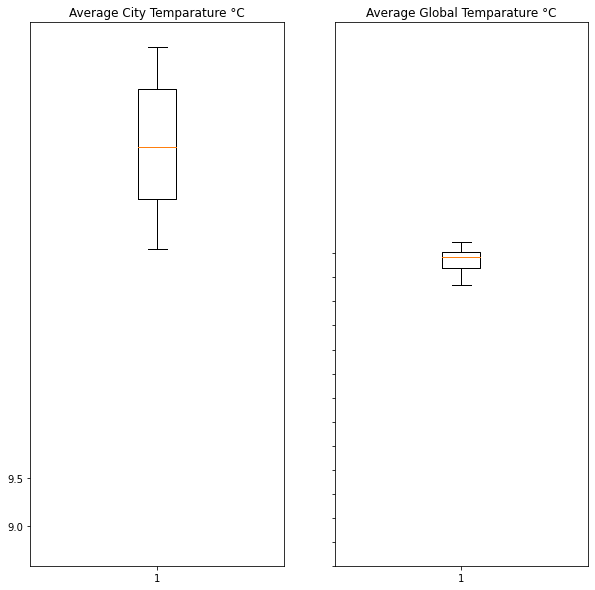

In [27]:
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,10), sharex='col', sharey='row')
axs[0].boxplot(city_data['city_avg_temp'])
axs[0].set_title('Average City Temparature °C')
axs[0].yaxis.set_ticks(np.arange(3,10,0.1))
axs[1].boxplot(city_data['global_avg_temp'])
axs[1].set_title('Average Global Temparature °C')
axs[1].yaxis.set_ticks(np.arange(3,10,0.5))
plt.show()

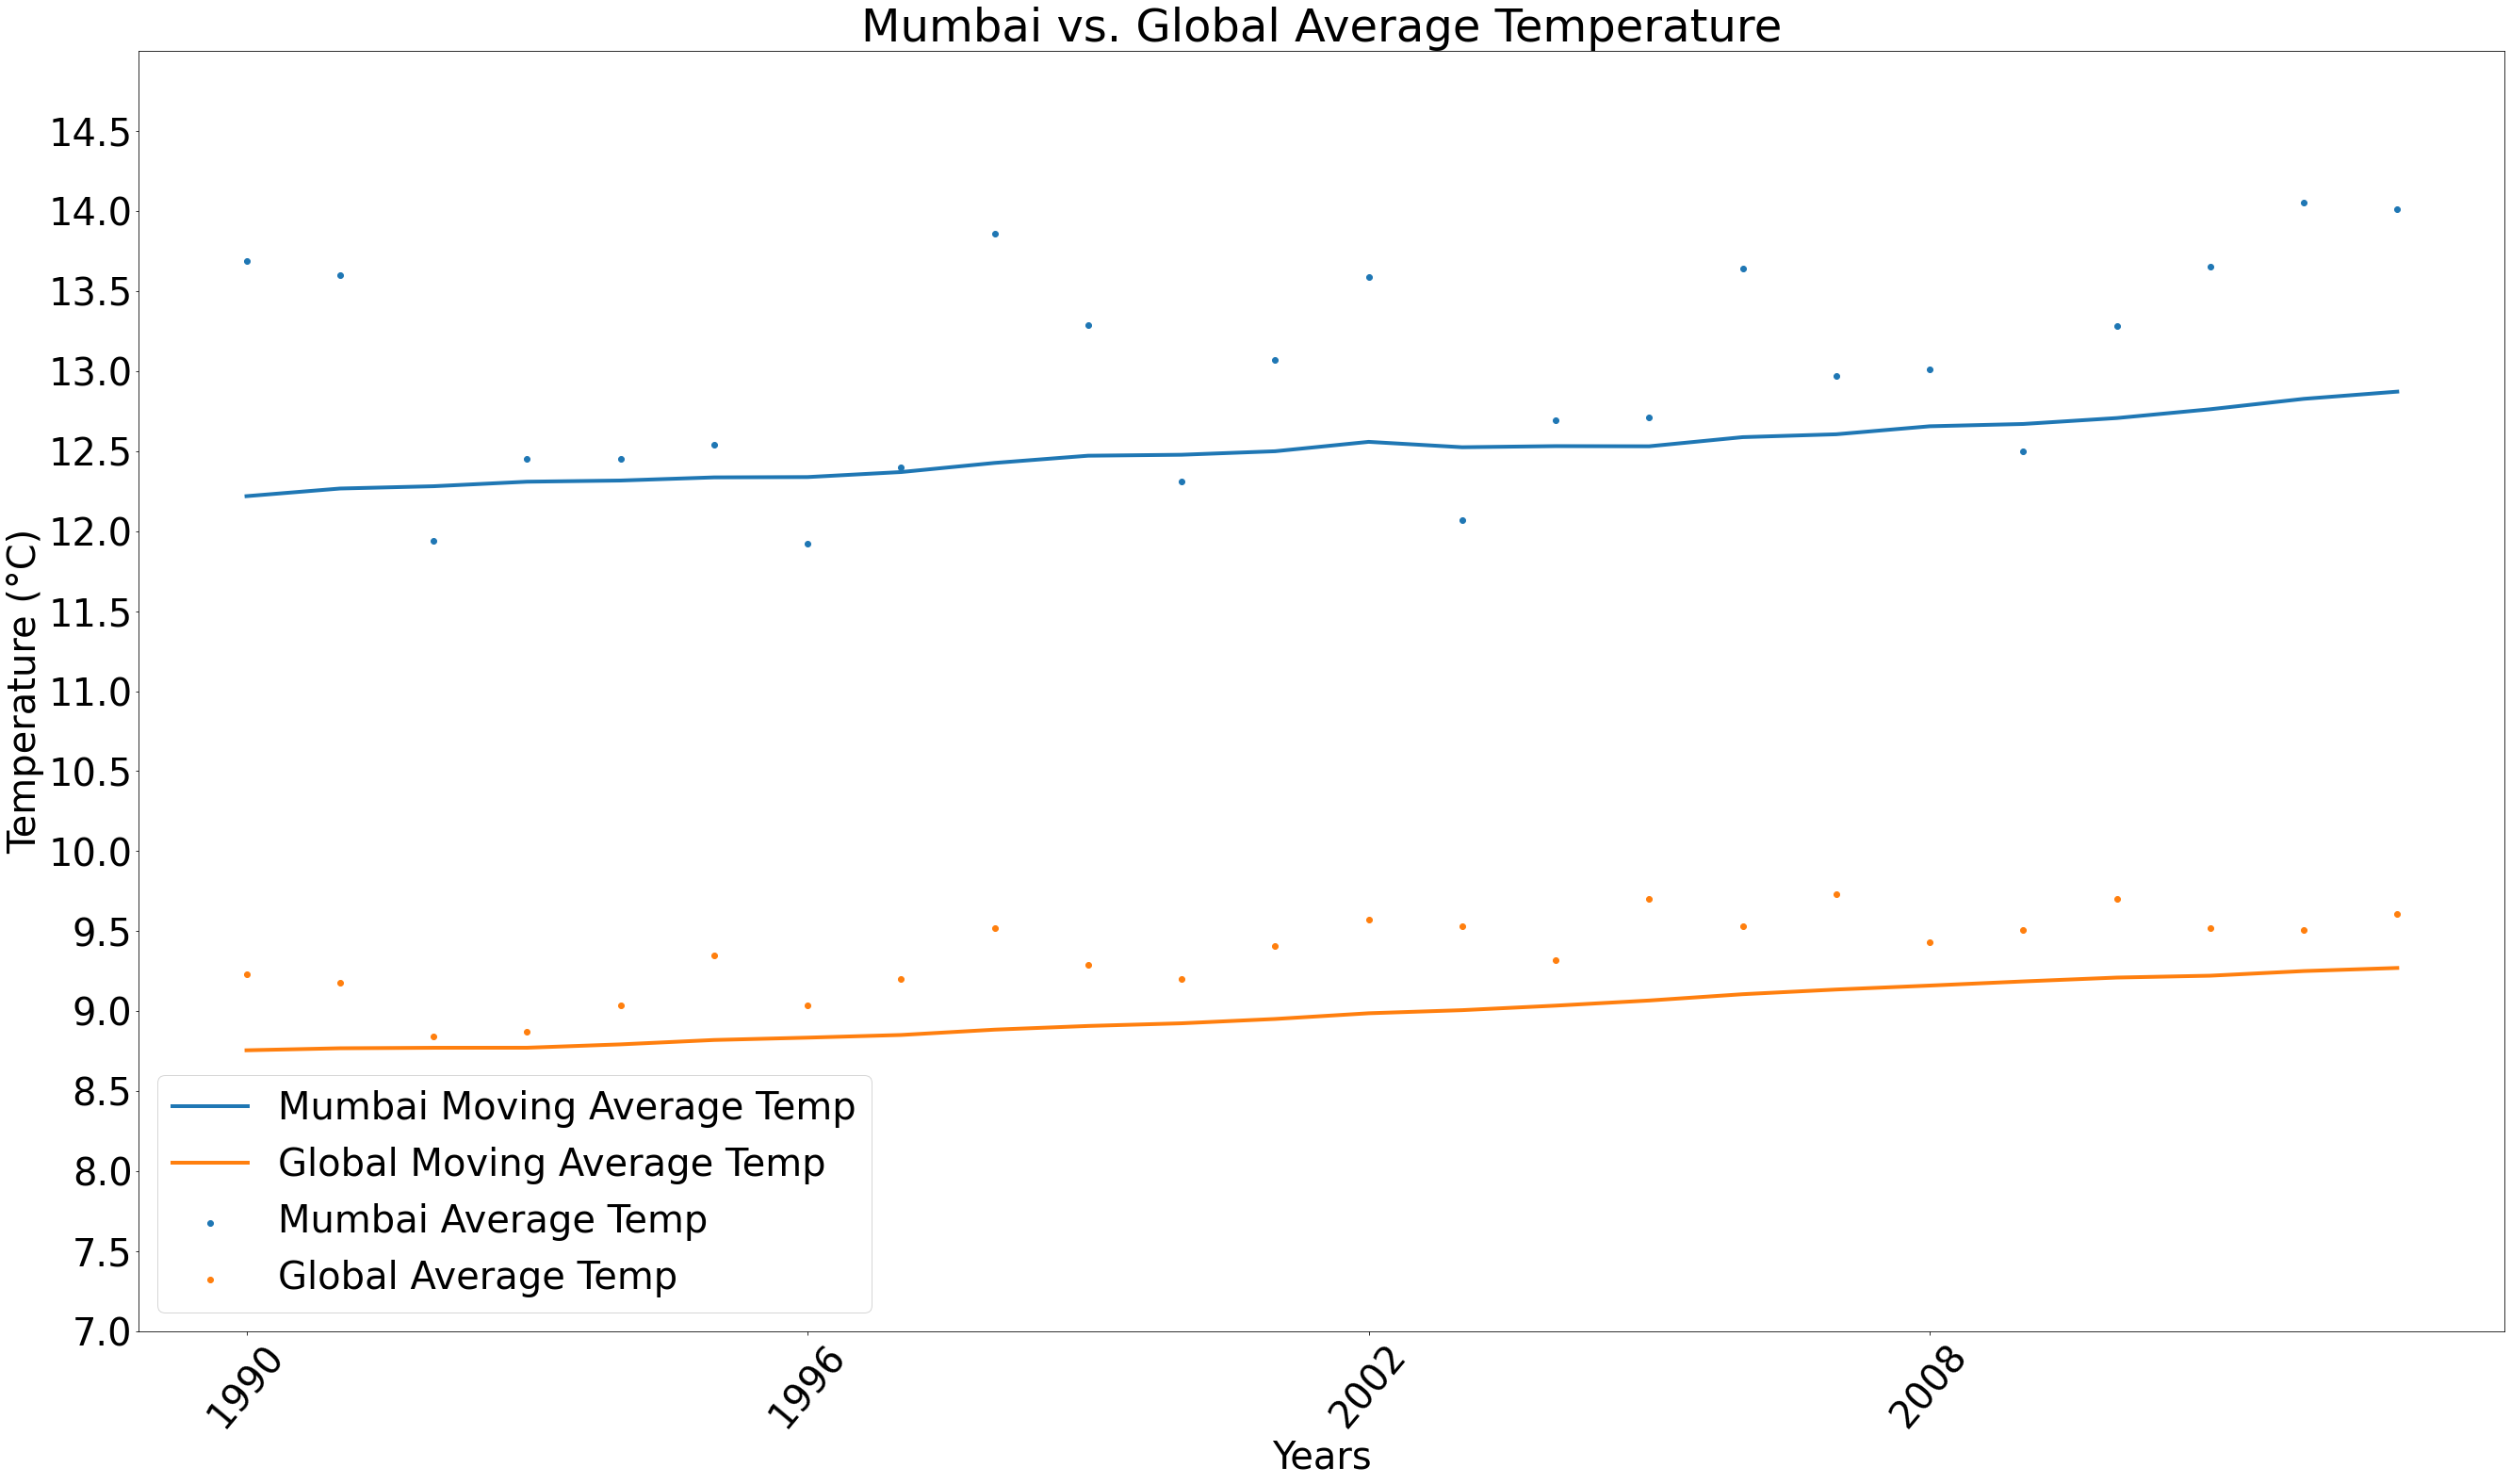

In [22]:
plt.rcParams.update({'font.size': 40})
plt.figure(figsize=(45,25))
plt.plot()
plt.plot(city_data['global_year'], city_data['city_mov_avg'], label = 'Mumbai Moving Average Temp',linewidth=4, markersize=12)
plt.scatter(city_data['global_year'], city_data['city_avg_temp'], label = 'Mumbai Average Temp ')
plt.plot(city_data['global_year'], city_data['global_mov_avg'],label = 'Global Moving Average Temp',linewidth=4, markersize=12)
plt.scatter(city_data['global_year'], city_data['global_avg_temp'], label = 'Global Average Temp ')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.title("Mumbai vs. Global Average Temperature")
plt.xticks(np.arange(min(city_data['global_year']), max(city_data['global_year']), 6))
plt.ylim(bottom = 7, top = 15)
plt.yticks(np.arange(7, 15, step=0.5))
plt.xticks(rotation=50)
plt.show()

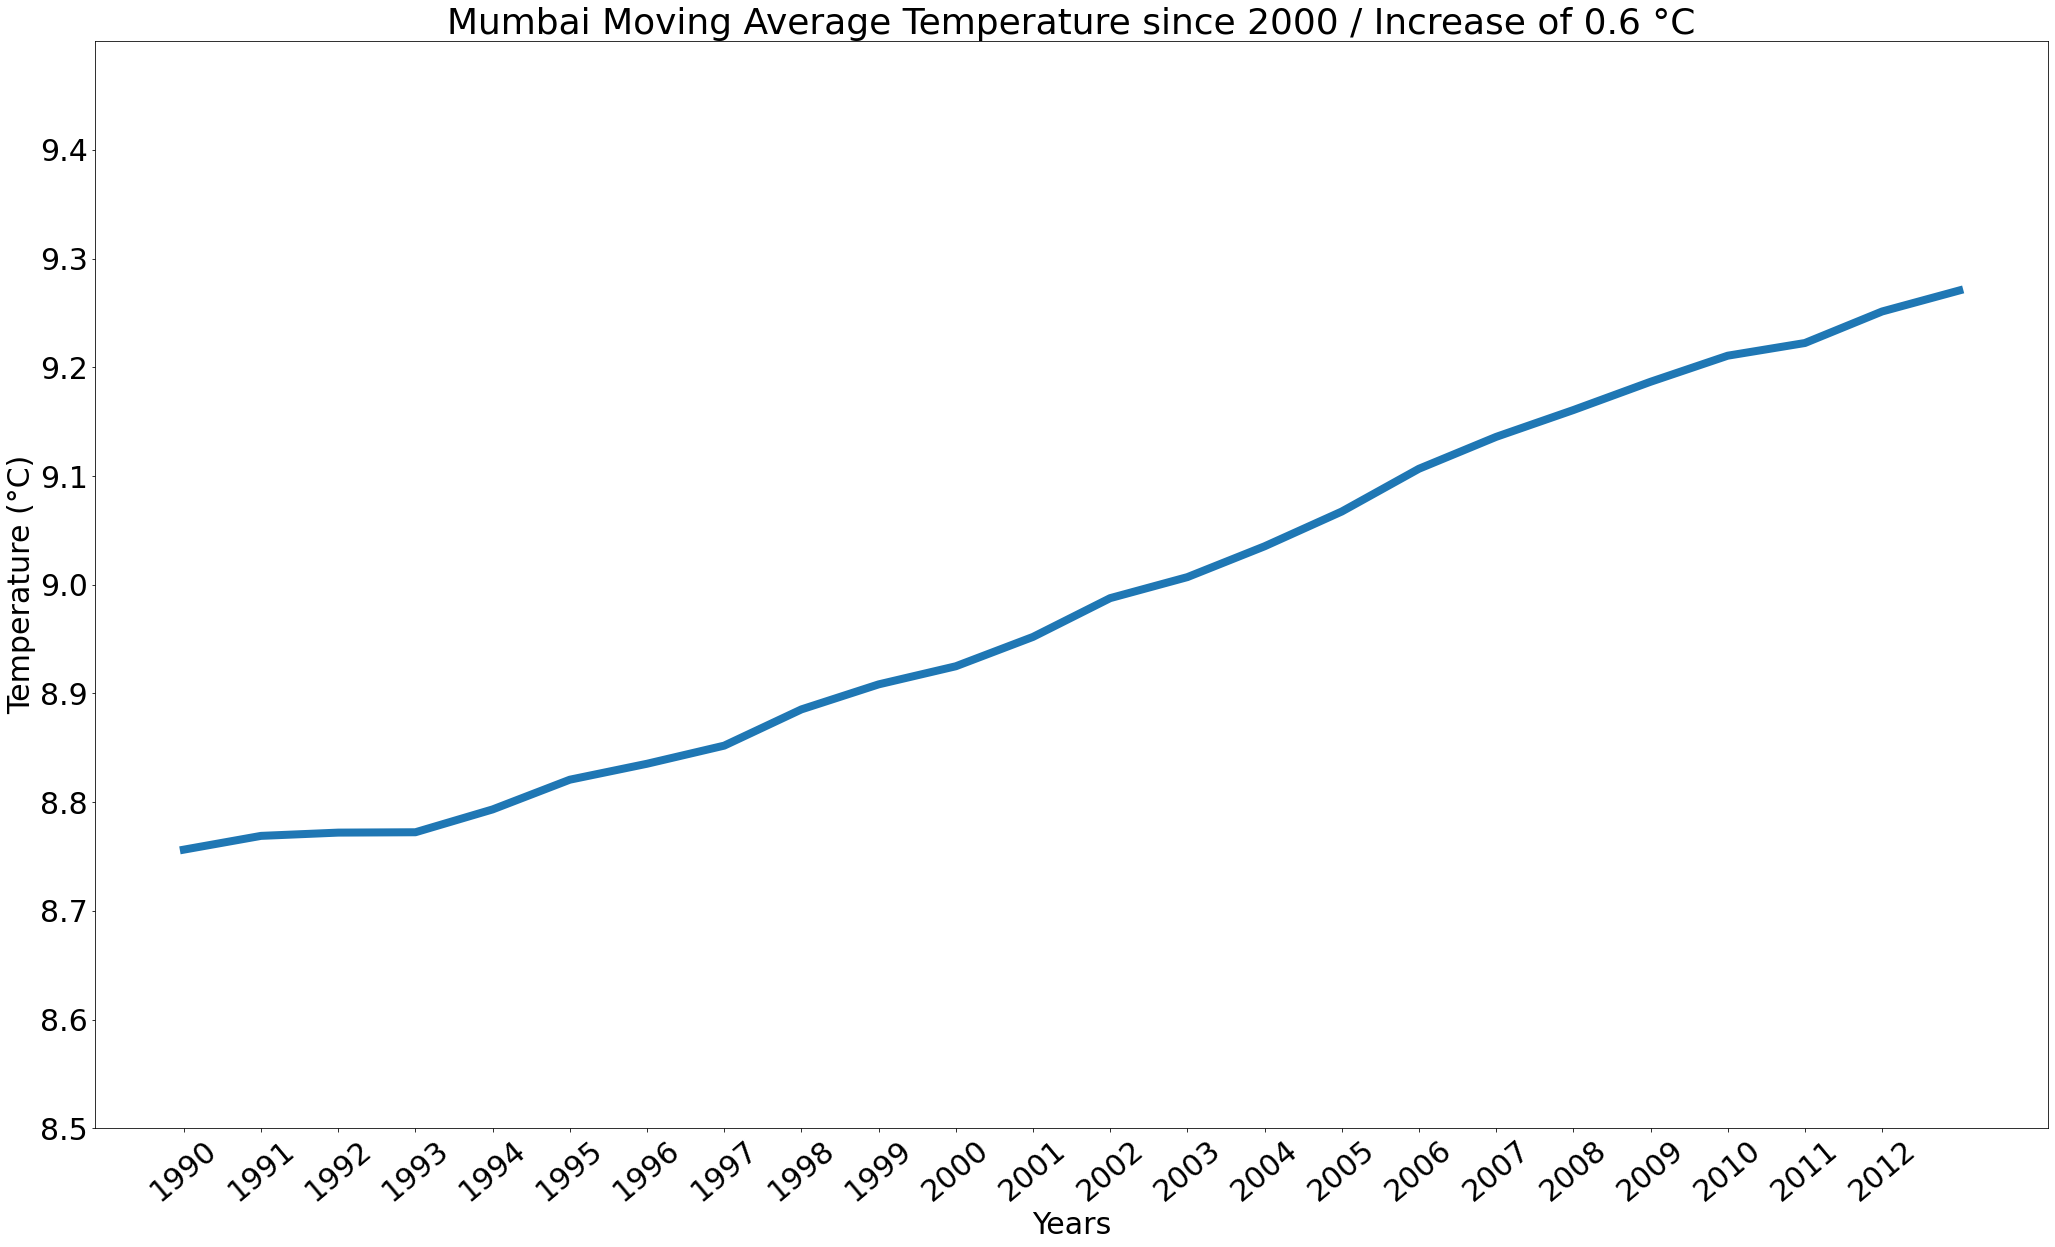

In [41]:
plt.rcParams.update({'font.size': 30})
city_data = city_data.loc[(city_data['global_year'] >=1990)]
temp_2000 = city_data.global_mov_avg.min()
temp_2020 = city_data.global_mov_avg.max()
temp_diff = temp_2020 - temp_2000

plt.figure(figsize=(35,20))
plt.plot(city_data['global_year'], city_data['global_mov_avg'],linewidth=8, markersize=12)
plt.plot(city_data['global_year'], city_data['city_mov_avg'],linewidth=8, markersize=12)
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.title("Mumbai Moving Average Temperature since 2000 / Increase of 0.6 °C".format(str('%.2f' % round(temp_diff,2))))
plt.xticks(np.arange(min(city_data['global_year']), max(city_data['global_year']), 1))
plt.ylim(bottom = 8.5, top = 9.5)
plt.yticks(np.arange(8.5, 9.5, step=0.1))
plt.xticks(rotation=40)
plt.show()

In [0]:
plt.hist(pd.city_data,range=10,density=False,label=13)